In [1]:
#Importing the Absenteeism_at_work Data Set
import pandas as pd
import os
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import numpy as np

# import the csv file
input_file = "Absenteeism_at_work_train.csv"
absentism_data_set = pd.read_csv(input_file)

print(absentism_data_set.shape)
print(absentism_data_set.describe())

(666, 21)
               ID  Reason for absence  Month of absence  Day of the week  \
count  666.000000          666.000000        666.000000       666.000000   
mean    17.674174           19.469970          6.441441         3.893393   
std     11.075428            8.345175          3.573128         1.423451   
min      1.000000            0.000000          1.000000         2.000000   
25%      7.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          7.000000         4.000000   
75%     28.000000           26.000000         10.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  666.000000              666.000000                       666.000000   
mean     2.552553              222.818318                        30.370871   
std      1.134994               66.853234                        14.905

It appears that there are 666 observations of 21 variables. Two variables (Weight and Hit Target) have less than 666 records, indicating the presence of missing values.

In [2]:
# Resolving conflicts with Age
absentism_data_set['Age']  = pd.to_numeric(absentism_data_set['Age'] , errors='coerce')
absentism_data_set['Age'] = absentism_data_set['Age'].replace(np.nan, 0, regex=True)
absentism_data_set['Age'] = absentism_data_set['Age'].astype('int64')
absentism_data_set['Age'].replace(0, np.nan, inplace=True)

In [3]:
# Pre-processing 
# Dropping Duplicates if any to keep only unique values
absentism_data_set = absentism_data_set.drop_duplicates(keep='first')
print(absentism_data_set.shape)

(639, 21)


There were 27 duplicates in the dataset that have been removed

In [4]:
absentism_data_set.describe(include = 'all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000,637.000000,639,...,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,637.000000,639.000000,639.000000,639.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"222,196",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.826291,19.198748,6.514867,3.881064,2.56025,224.413146,30.079812,12.635368,36.406593,NaN,...,0.056338,1.253521,1.065728,0.580595,0.071987,0.707355,79.062794,171.940532,26.738654,6.934272
std,10.956720,8.402657,3.536112,1.430172,1.14157,67.011052,14.751491,4.334024,6.443232,NaN,...,0.230754,0.624637,1.131786,0.493848,0.258670,1.182603,12.675776,6.038765,4.231424,12.897914
min,1.000000,0.000000,1.000000,2.000000,1.00000,0.000000,5.000000,1.000000,27.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.00000,179.000000,17.000000,9.000000,31.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.00000,225.000000,26.000000,13.000000,37.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.00000,260.000000,50.000000,16.000000,40.000000,NaN,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000


In [5]:
absentism_data_set.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33.0,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50.0,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38.0,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39.0,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33.0,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [6]:
for i in range(absentism_data_set.shape[0]): 
    if absentism_data_set["Reason for absence"].iloc[i] == 0.0:
        absentism_data_set["Reason for absence"].iloc[i] = np.nan
        
absentism_data_set["Reason for absence"].describe()

count    603.000000
mean      20.344942
std        7.174180
min        1.000000
25%       14.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64

Noticed variable Reason for absence has minimum value of 0, when the minimim value should be 1 to represent Certain infectious and parasitic diseases 


Missing values: Before

In [7]:
# Missing Values
absentism_data_set.isnull().sum() 

ID                                  0
Reason for absence                 36
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 2
Work load Average/day               0
Hit target                          1
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              2
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [8]:
#To drop unnessary Columns
to_drop = ['ID']
absentism_data_set.drop(to_drop, inplace=True, axis=1)

In [9]:
# Resolving missing values with mean substitution 
absentism_data_set["Reason for absence"] = absentism_data_set["Reason for absence"].fillna(absentism_data_set["Reason for absence"].mode().iloc[0])
absentism_data_set["Age"].fillna(absentism_data_set["Age"].mean(), inplace=True)
absentism_data_set["Hit target"].fillna(absentism_data_set["Hit target"].mean(), inplace=True)
absentism_data_set["Weight"].fillna(absentism_data_set["Weight"].mean(), inplace=True)

In [10]:
absentism_data_set.dtypes

Reason for absence                 float64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                float64
Work load Average/day               object
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

Missing values: After

In [11]:
# Missing Values
absentism_data_set.isnull().sum() 

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

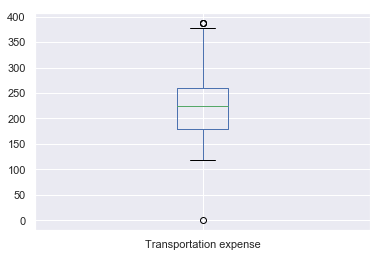

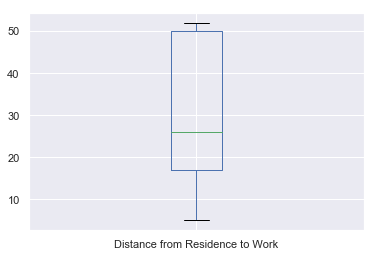

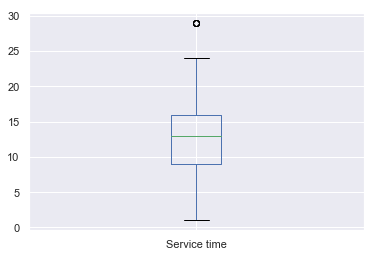

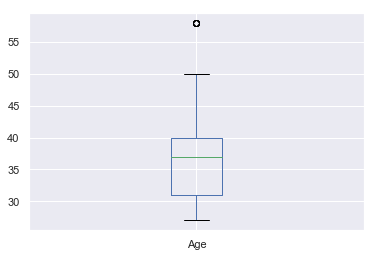

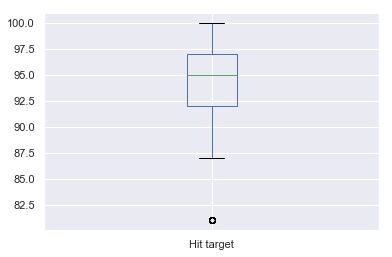

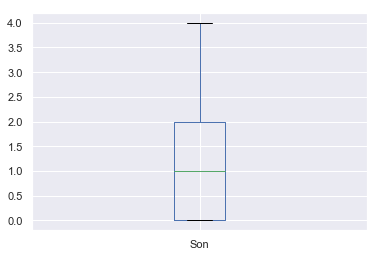

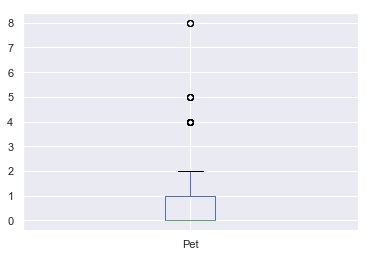

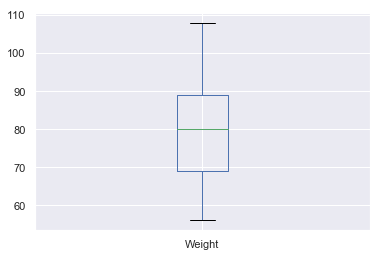

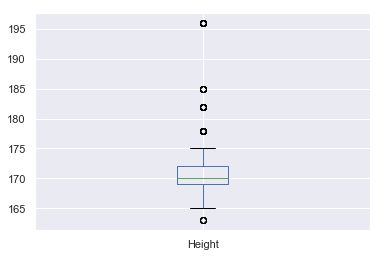

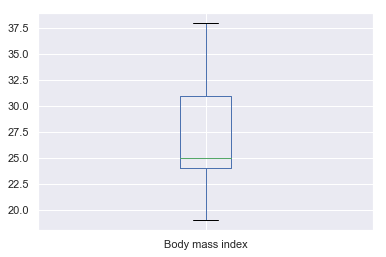

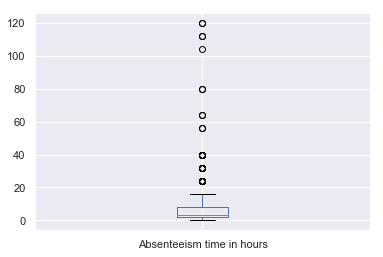

In [13]:
Absentism_Categorical_col = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker','Work load Average/day']
Absentism_Non_Categorical_col = [i for i in absentism_data_set.columns if i not in Absentism_Categorical_col]
for i in Absentism_Non_Categorical_col:
    absentism_data_set.boxplot(column=i)
    plt.show()

,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.235130,-0.360342,-0.218637,-0.074124,0.370875,0.429298,-0.217383,-0.214425,-0.131880,-0.008392
Distance from Residence to Work,0.235130,1.000000,0.153020,-0.134850,-0.009935,0.065121,0.176902,-0.043122,-0.358450,0.128976,-0.079313
Service time,-0.360342,0.153020,1.000000,0.671901,-0.012149,-0.078826,-0.428188,0.441761,-0.055508,0.501448,0.007982
Age,-0.218637,-0.134850,0.671901,1.000000,-0.049423,0.036150,-0.253441,0.401808,-0.080070,0.472045,0.035360
Hit target,-0.074124,-0.009935,-0.012149,-0.049423,1.000000,-0.001920,0.004356,-0.067362,0.070754,-0.096100,0.039630
Son,0.370875,0.065121,-0.078826,0.036150,-0.001920,1.000000,0.088170,-0.174509,-0.043918,-0.165615,0.072881
Pet,0.429298,0.176902,-0.428188,-0.253441,0.004356,0.088170,1.000000,-0.110930,-0.146858,-0.057906,-0.034454
Weight,-0.217383,-0.043122,0.441761,0.401808,-0.067362,-0.174509,-0.110930,1.000000,0.314610,0.894607,0.032405
Height,-0.214425,-0.358450,-0.055508,-0.080070,0.070754,-0.043918,-0.146858,0.314610,1.000000,-0.120529,0.154360
Body mass index,-0.131880,0.128976,0.501448,0.472045,-0.096100,-0.165615,-0.057906,0.894607,-0.120529,1.000000,-0.039316


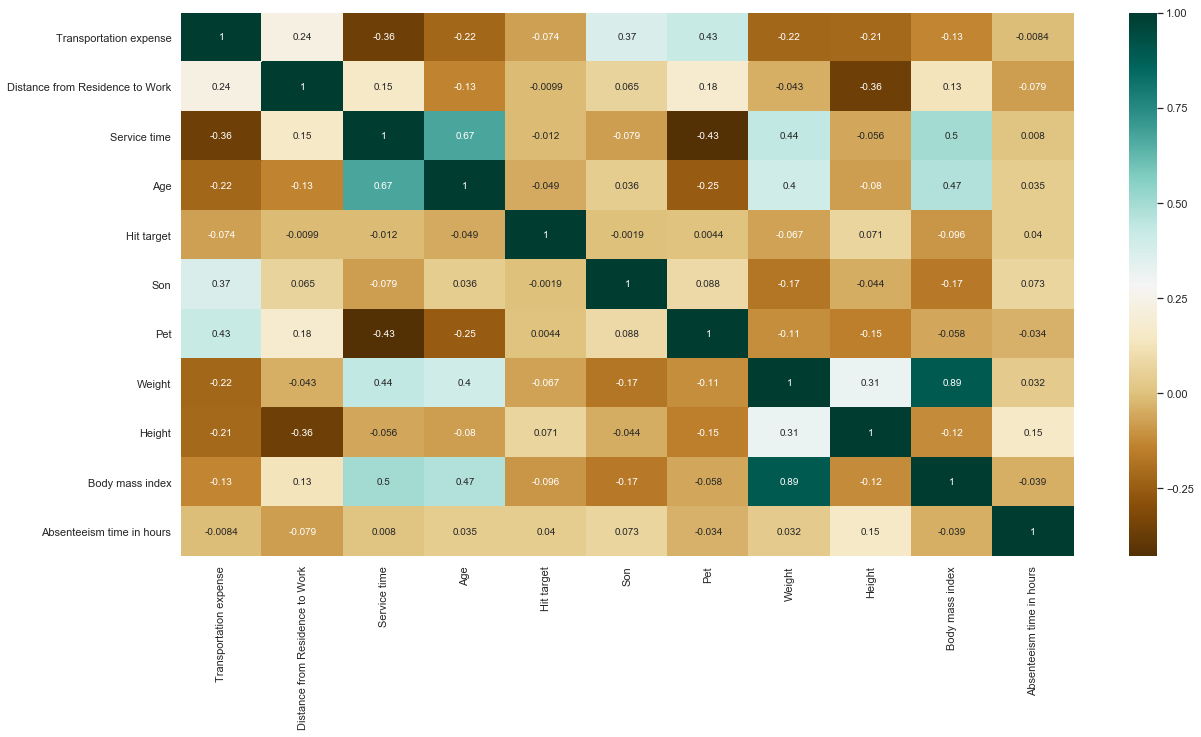

In [14]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correlation_set= absentism_data_set[Absentism_Non_Categorical_col].corr()
sns.heatmap(correlation_set,cmap="BrBG",annot=True)
correlation_set

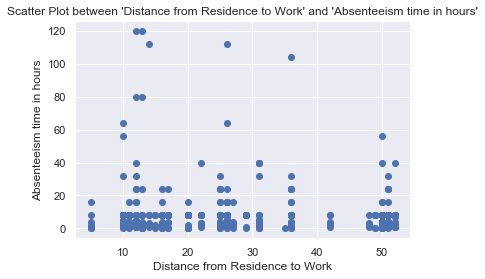

In [21]:
#Scatter Plot between "Distance from Residence to Work" and "Absenteeism time in hours"
plt.scatter(absentism_data_set['Distance from Residence to Work'],absentism_data_set['Absenteeism time in hours'])
plt.title("Scatter Plot between 'Distance from Residence to Work' and 'Absenteeism time in hours'")
plt.xlabel("Distance from Residence to Work")
plt.ylabel("Absenteeism time in hours")
plt.show()

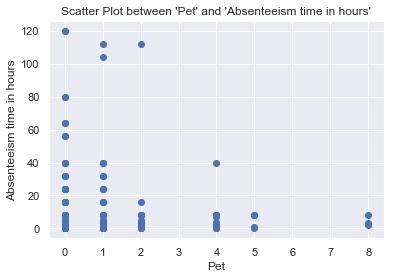

In [22]:
#Scatter Plot between "Distance from Residence to Work" and "Absenteeism time in hours"
plt.scatter(absentism_data_set['Pet'],absentism_data_set['Absenteeism time in hours'])
plt.title("Scatter Plot between 'Pet' and 'Absenteeism time in hours'")
plt.xlabel("Pet")
plt.ylabel("Absenteeism time in hours")
plt.show()

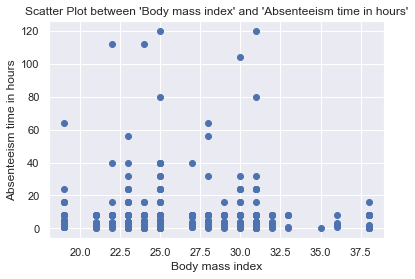

In [23]:
#Scatter Plot between "Distance from Residence to Work" and "Absenteeism time in hours"
plt.scatter(absentism_data_set['Body mass index'],absentism_data_set['Absenteeism time in hours'])
plt.title("Scatter Plot between 'Body mass index' and 'Absenteeism time in hours'")
plt.xlabel("Body mass index")
plt.ylabel("Absenteeism time in hours")
plt.show()